# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/BC with ultrasound.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df.head()

Unnamed: 0   patientID patient No  DVD NO Right Mammogram     \
0 2019-04-25   BC 007741      PTNT1       2            BIRAD 2   
1 2019-04-24   BC 005401      PTNT1       3            BIRAD 2   
2 2019-04-24  BC 0021806      PTNT3       3            BIRAD 2   
3 2019-04-23  BC 0026041     PTNT2        4            BIRAD 2   
4 2019-04-23  BC 0026062      PTNT3       4            BIRAD 2   

  Left Mammogram   Right Ultrasound Left Ultrasound  
0         BIRAD 2               NaN             NaN  
1         BIRAD 2               NaN             NaN  
2         BIRAD 2               NaN             NaN  
3         BIRAD 2               NaN             NaN  
4         BIRAD 2               NaN             NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1493 non-null   datetime64[ns]
 1   patientID           1493 non-null   object        
 2   patient No          1493 non-null   object        
 3   DVD NO              1493 non-null   int64         
 4   Right Mammogram     1493 non-null   object        
 5   Left Mammogram      1493 non-null   object        
 6    Right Ultrasound   202 non-null    object        
 7   Left Ultrasound     205 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 93.4+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'patientID', 'patient No', 'DVD NO', 'Right Mammogram   ',
       'Left Mammogram ', ' Right Ultrasound', 'Left Ultrasound'],
      dtype='object')

In [ ]:
df.shape

(1493, 8)

In [ ]:
df.tail()

Unnamed: 0  patientID patient No  DVD NO Right Mammogram     \
1488 2013-11-14  BC 010501      PTNT2     306            BIRAD 1   
1489 2013-11-13  BC 010401      PTNT2     307            BIRAD 0   
1490 2013-11-13  BC 009942      PTNT3     307            BIRAD 1   
1491 2013-11-11  BC 001642      PTNT1     308            BIRAD 0   
1492 2013-11-11  BC 010241      PTNT2     308            BIRAD 1   

     Left Mammogram   Right Ultrasound Left Ultrasound  
1488         BIRAD 1               NaN             NaN  
1489         BIRAD 0           BIRAD 2         BIRAD 2  
1490         BIRAD 1               NaN             NaN  
1491         BIRAD 0           BIRAD 2         BIRAD 2  
1492         BIRAD 1               NaN             NaN

In [ ]:
df1=pd.read_excel('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/correctSheetlast.xlsx')
df1

ASSESEMENT   number of cases  ASSESEMENT .1  \
0      BIRAD 0            1174.0       BIRAD 0   
1      BIRAD 1            1808.0       BIRAD 1   
2      BIRAD 2            2932.0       BIRAD 2   
3      BIRAD 3             137.0       BIRAD 3   
4      BIRAD 4              36.0       BIRAD 4   
5      BIRAD 5              22.0       BIRAD 5   
6         sum             6109.0           sum   
7          NaN               NaN           NaN   
8          NaN               NaN           NaN   
9          NaN               NaN           NaN   
10         NaN               NaN           NaN   
11         NaN               NaN           NaN   
12         NaN               NaN           NaN   
13         NaN               NaN           NaN   
14         NaN               NaN           NaN   
15         NaN               NaN           NaN   
16         NaN               NaN           NaN   
17         NaN               NaN           NaN   
18         NaN               NaN           NaN   
19         NaN               NaN           NaN   
20         NaN               NaN           NaN   
21         NaN               NaN           NaN   
22         NaN               NaN           NaN   

    number of case of doctor anotation  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0                                  0.0         NaN         NaN         NaN   
1                                  0.0         NaN         NaN         NaN   
2                                110.0         NaN         NaN         NaN   
3                                 76.0         NaN         NaN         NaN   
4                                 32.0         NaN         NaN         NaN   
5                                 17.0         NaN         NaN         NaN   
6                                235.0         NaN         NaN         NaN   
7                                  NaN         NaN         NaN         NaN   
8                                  NaN         NaN         NaN         NaN   
9                                  NaN         NaN         NaN         NaN   
10                                 NaN         NaN         NaN         NaN   
11                                 NaN         NaN         NaN         NaN   
12                                 NaN         NaN         NaN         NaN   
13                                 NaN         NaN         NaN         NaN   
14                                 NaN         NaN         NaN         NaN   
15                                 NaN         NaN         NaN         NaN   
16                                 NaN         NaN         NaN         NaN   
17                                 NaN         NaN         NaN         NaN   
18                                 NaN         NaN         NaN         NaN   
19                                 NaN         NaN         NaN         NaN   
20                                 NaN         NaN         NaN         NaN   
21                                 NaN         NaN         NaN         NaN   
22                                 NaN         NaN         NaN         NaN   

    Unnamed: 7  Unnamed: 8 Unnamed: 9 Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0          NaN         NaN        NaN         NaN          NaN          NaN   
1          NaN         NaN        NaN         NaN          NaN          NaN   
2          NaN         NaN        NaN         NaN          NaN          NaN   
3          NaN         NaN        NaN         NaN          NaN          NaN   
4          NaN         NaN        NaN         NaN          NaN          NaN   
5          NaN         NaN        NaN         NaN          NaN          NaN   
6          NaN         NaN        NaN         NaN          NaN          NaN   
7          NaN         NaN        NaN         NaN          NaN          NaN   
8          NaN         NaN        NaN         NaN          NaN          NaN   
9          NaN         NaN        NaN         NaN          NaN          NaN   
10         NaN         NaN        NaN         NaN          N

In [ ]:
df1.shape

(23, 16)

In [ ]:
df1.columns

Index(['ASSESEMENT ', 'number of cases ', 'ASSESEMENT .1',
       'number of case of doctor anotation', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [ ]:
image_dir1 = '/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/BIRAD1/b1'
lst1=os.listdir(image_dir1)
len(lst1)

1865

In [ ]:
image_dir2 = '/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/Birad3/b3'
lst2=os.listdir(image_dir2)
len(lst2)

387

In [ ]:
image_dir3 = '/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/Birad4/b4'
lst3=os.listdir(image_dir3)
len(lst3)

102

In [ ]:
image_dir4 = '/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/Birad5/Birad5'
lst4=os.listdir(image_dir4)
len(lst4)

24

In [ ]:
from matplotlib.image import imread
import cv2
from tqdm import tqdm

img_dir='/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset'
lst=os.listdir(img_dir)
img_arr=[]
labels=[]
for i in range(2,len(lst)-1):
  img_d=os.listdir(img_dir+"/"+lst[i])
  image_folder=os.path.join(img_dir,lst[i],img_d[0])
  image_lt=os.listdir(image_folder)
  for img_name in tqdm(image_lt):
    n_img = cv2.imread(os.path.join(image_folder,img_name), cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (299, 299), interpolation = cv2.INTER_LINEAR)
     # grey level
    img_bw = cv2.cvtColor(n_img_size, cv2.COLOR_BGR2GRAY)
    # CLAHE algo
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(img_bw) + 30
    # erosion
    kernel = np.ones((5, 5), np.uint8)
    erode_img = cv2.erode(clahe_img, kernel)
    # RGB
    final_img = cv2.cvtColor(erode_img, cv2.COLOR_GRAY2RGB)
    img_arr.append(final_img)
    labels.append(i)
len(img_arr),len(labels)

100%|██████████| 24/24 [00:00<00:00, 91.35it/s]


(2378, 2378)

In [ ]:
img_array=np.array(img_arr)
label=np.array(labels)

In [ ]:
img_arr[2220],labels[2220]

(array([[[36, 36, 36],
         [36, 36, 36],
         [36, 36, 36],
         ...,
         [36, 36, 36],
         [36, 36, 36],
         [36, 36, 36]],
 
        [[36, 36, 36],
         [36, 36, 36],
         [36, 36, 36],
         ...,
         [36, 36, 36],
         [36, 36, 36],
         [36, 36, 36]],
 
        [[36, 36, 36],
         [36, 36, 36],
         [36, 36, 36],
         ...,
         [36, 36, 36],
         [36, 36, 36],
         [36, 36, 36]],
 
        ...,
 
        [[36, 36, 36],
         [36, 36, 36],
         [36, 36, 36],
         ...,
         [36, 36, 36],
         [36, 36, 36],
         [36, 36, 36]],
 
        [[36, 36, 36],
         [36, 36, 36],
         [36, 36, 36],
         ...,
         [36, 36, 36],
         [36, 36, 36],
         [36, 36, 36]],
 
        [[36, 36, 36],
         [36, 36, 36],
         [36, 36, 36],
         ...,
         [36, 36, 36],
         [36, 36, 36],
         [36, 36, 36]]], dtype=uint8), 3)

In [ ]:
img_array.shape,label.shape

((2378, 299, 299, 3), (2378,))

In [ ]:
label[0]

2

In [ ]:
np.save('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/299_image_X',img_array)
np.save('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/299_image_y',label)

In [ ]:
import numpy as np
X=np.load('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/299_image_X.npy')
y=np.load('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/299_image_y.npy')

print('X shape : {}' .format(X.shape))
y

X shape : (2378, 299, 299, 3)


array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
set(y)

{2, 3, 4, 5}

In [ ]:
# d={'CC_L': 0,
#  'MLO_L': 1,
#  'CC_R': 2,
#  'MLO_R': 3}
# y=pd.Series(y).map(d).values
y-2

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,stratify=y)

rate = 0.5
num = int(X.shape[0] * rate)
y_train = to_categorical(y_train-2, 4)
y_test = to_categorical(y_test-2, 4)

print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (1783, 299, 299, 3)
X_test shape : (595, 299, 299, 3)
y_train shape : (1783, 4)
y_test shape : (595, 4)


In [ ]:
del X,y

# Convolution Neural Network

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (299, 299,3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
#tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
#tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(512, activation = 'tanh'),
tf.keras.layers.Dense(128, activation = 'tanh'),
tf.keras.layers.Dense(4, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 74, 74, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 74, 74, 128)      

In [ ]:
y_train.shape,y_test.shape

((1783, 4), (595, 4))

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_299.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30 , batch_size = 128,callbacks=[callback])

Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 1.0227 - accuracy: 0.7100
Epoch 1: val_accuracy improved from -inf to 0.78487, saving model to /content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_299.h5
14/14 [==============================] - 17s 1s/step - loss: 1.0227 - accuracy: 0.7100 - val_loss: 0.6965 - val_accuracy: 0.7849
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 0.6329 - accuracy: 0.7841
Epoch 2: val_accuracy did not improve from 0.78487
14/14 [==============================] - 9s 636ms/step - loss: 0.6329 - accuracy: 0.7841 - val_loss: 0.6232 - val_accuracy: 0.7849
Epoch 3/30
14/14 [==============================] - ETA: 0s - loss: 0.5698 - accuracy: 0.7852
Epoch 3: val_accuracy improved from 0.78487 to 0.79832, saving model to /content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_299.h5
14/14 [==============================] - 16s 1s/step - loss: 0.5698 - accuracy: 0.7852 - val_loss: 0.4905 

In [ ]:
model.evaluate(X_test,y_test)

19/19 [==============================] - 1s 37ms/step - loss: 0.6654 - accuracy: 0.7849


[0.665435791015625, 0.7848739624023438]

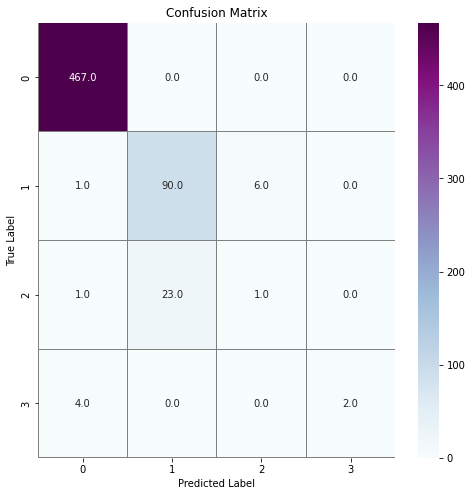

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

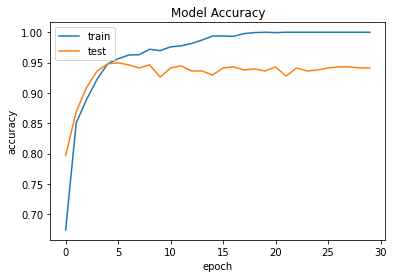

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

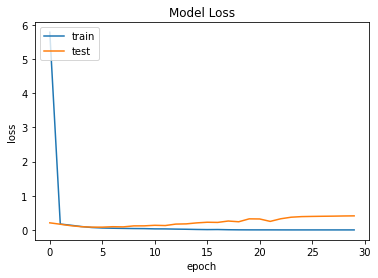

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(X_test)
prediction

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.1034376e-23, 1.0000000e+00, 2.2030823e-12, 1.7372507e-29],
       ...,
       [1.7166544e-08, 9.5065248e-01, 4.9347334e-02, 1.1922947e-07],
       [1.2742256e-18, 1.0000000e+00, 1.7290345e-12, 2.8102839e-18],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.1211688e-28]],
      dtype=float32)

In [ ]:

def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])


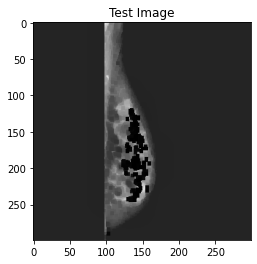

In [ ]:
index = 90
img_plot(X_test, index)

# Transfer Learning

## InceptionV3

In [ ]:
import tensorflow as tf

image_model = tf.keras.applications.InceptionV3(include_top=True,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

96124928/96112376 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_5[0][0]']               
 alization)                  

In [ ]:
X_train.shape,y_train.shape

((1783, 299, 299, 3), (1783, 4))

In [ ]:
image_embed=image_features_extract_model.predict(X_train)
image_embed.shape

(1783, 2048)

In [ ]:
image_embed_test=image_features_extract_model.predict(X_test)
image_embed_test.shape

(595, 2048)

In [ ]:
np.save('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/vector_xtrain',image_embed)
np.save('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/vector_xtest',image_embed_test)

In [ ]:
inc_Xtrain=np.load('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/vector_xtrain.npy')
inc_Xtest=np.load('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/vector_xtest.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(2048,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                131136    
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 4)                 516       
                                                                 
Total params: 139,972
Trainable params: 139,972
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_v3.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
history = model.fit(inc_Xtrain, y_train, validation_data = (inc_Xtest, y_test), epochs =100 , batch_size = 128,callbacks=[callback])

Epoch 1/100
 1/14 [=>............................] - ETA: 4s - loss: 1.6001 - accuracy: 0.5391
Epoch 1: val_accuracy improved from -inf to 0.81176, saving model to /content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_v3.h5
14/14 [==============================] - 1s 18ms/step - loss: 1.2988 - accuracy: 0.7560 - val_loss: 0.7431 - val_accuracy: 0.8118
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 0.7876 - accuracy: 0.8203
Epoch 2: val_accuracy improved from 0.81176 to 0.82017, saving model to /content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_v3.h5
14/14 [==============================] - 0s 9ms/step - loss: 0.5280 - accuracy: 0.8099 - val_loss: 0.4561 - val_accuracy: 0.8202
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 0.2440 - accuracy: 0.9062
Epoch 3: val_accuracy improved from 0.82017 to 0.84538, saving model to /content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_v3.h5
14/14 

# Final Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
cnn_model1=load_model('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_299.h5')
cnn_model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 74, 74, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 74, 74, 128)      

In [ ]:
inc_Xtrain=np.load('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/vector_xtrain.npy')
inc_Xtest=np.load('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/temp/vector_xtest.npy')

In [ ]:
inc_Xtrain.shape,inc_Xtest.shape

((1783, 2048), (595, 2048))

In [ ]:
cnn_extractor1=Model(inputs=cnn_model1.input,outputs=cnn_model1.get_layer('dense_13').output)
cnn_extractor1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20_input (InputLayer  [(None, 299, 299, 3)]    0         
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                             

In [ ]:
image_embed_train1=cnn_extractor1.predict(X_train)
image_embed_train1.shape

(1783, 128)

In [ ]:
image_embed_test1=cnn_extractor1.predict(X_test)
image_embed_test1.shape

(595, 128)

In [ ]:
final_Xtrain1=np.hstack((inc_Xtrain,image_embed_train1))

In [ ]:
final_Xtest1=np.hstack((inc_Xtest,image_embed_test1))

In [ ]:
import numpy as np
y_train1=y_train
y_train1=np.where(y_train1==1)[1]

In [ ]:
import numpy as np
y_test1=y_test
y_test1=np.where(y_test1==1)[1]

# Machine learning Classifier

In [ ]:
import xgboost
from xgboost import XGBClassifier
model1 = XGBClassifier()
# fit the model on the whole dataset
model1.fit(final_Xtrain1,y_train1)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred1 = model1.predict(final_Xtest1)
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test1, y_pred1))
cm

Accuracy :  0.9394957983193277


array([[467,   0,   0,   0],
       [  0,  89,   8,   0],
       [  0,  23,   2,   0],
       [  5,   0,   0,   1]])

# final model classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       467
           1       0.61      0.78      0.69        97
           2       0.00      0.00      0.00        25
           3       1.00      0.33      0.50         6

    accuracy                           0.86       595
   macro avg       0.64      0.51      0.53       595
weighted avg       0.84      0.86      0.85       595



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN classification report

In [ ]:
cnn_mod=load_model('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_299.h5')
cnn_mod.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 74, 74, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 74, 74, 128)      

In [ ]:
y_pred = cnn_mod.predict(X_test)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       467
           1       0.53      0.93      0.68        97
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00         6

    accuracy                           0.84       595
   macro avg       0.37      0.45      0.40       595
weighted avg       0.84      0.84      0.83       595



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mod=load_model('/content/drive/MyDrive/king-abdulaziz-university-mammogram-dataset/model_v3.h5')
mod.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                131136    
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 4)                 516       
                                                                 
Total params: 139,972
Trainable params: 139,972
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = mod.predict(inc_Xtest)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

# inception classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       467
           1       0.70      0.76      0.73        97
           2       0.20      0.04      0.07        25
           3       0.75      0.50      0.60         6

    accuracy                           0.89       595
   macro avg       0.65      0.57      0.59       595
weighted avg       0.86      0.89      0.87       595



# Results

In [ ]:
#Results
#CNN :- 84.034
#InceptionV3 :- 88.57
#Final Results :- 93.94